In [1]:
import sys
import os
#sys.path.insert(0, "/usr/src/app/app")
def import_path(fullpath):
    """ 
    Import a file with full path specification. Allows one to
    import from anywhere, something __import__ does not do. 
    """
    path, filename = os.path.split(fullpath)
    filename, ext = os.path.splitext(filename)
    sys.path.append(path)
    module = __import__(filename)
   # reload(module) # Might be out of date
    del sys.path[-1]
    return module
import_path("/usr/src/app/app")

<module 'app' from '/usr/src/app/app/__init__.py'>

In [2]:
from PIL import Image

from app.pkg.ml.autotags.autotag import AutoTagger
from app.pkg.ml.buffer_converters import BytesConverter

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
at = AutoTagger()

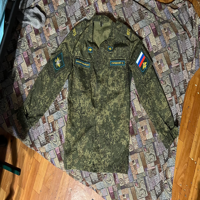

In [33]:
fp = "/usr/src/app/data/example/mil_jacket.png"
tags = [["blose", "jacket", "t-shirt", "pants", "military jacket", "trousers"], ["winter", "summer", "autumn", "spring"]]

image = Image.open(fp)
inp_data = {"image":at.bytes_converter.image_to_bytes(image), "tags":tags}

image.resize((200,200))

In [34]:
im_f, text_f = at.get_tags(input_data=inp_data)

In [35]:
from torch.nn import Softmax
import torch
sf = Softmax(dim=1)
for i, text_block_tags in enumerate(tags):
    logits = im_f @ text_f[i].T
    probabilities = sf(logits)
    probabilities = probabilities.flatten().tolist()
    # probabilities = torch.round(probabilities).tolist()
    
    res_string = ''
    for tag, prob in zip(text_block_tags, probabilities):
        r_prob = round(prob,3)
        res_string += f'{tag}:{r_prob}, '
    print(res_string)
    #break
    #for j in text_block_tags:

blose:0.0, jacket:0.012, t-shirt:0.003, pants:0.0, military jacket:0.985, trousers:0.0, 
winter:0.435, summer:0.293, autumn:0.025, spring:0.247, 
